# Convolutional Neural Networks

In TensorFlow, each input image is typically represented as a 3D tensor of shape `[height, width, channels]`. A mini-batch is represented as a 4D tensor of shape `[mini-batch size, height, width, channels]`. The weights of a convolutional layer are represented as a 4D tensor of a convolutional layer are represented as a 4D tensor of shape [ $ f_h, f_w, f_n, f_{n'} $]. The bias terms of a convolutional layer are simply represented as a 1D tensor of shape [$ f_n $].

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


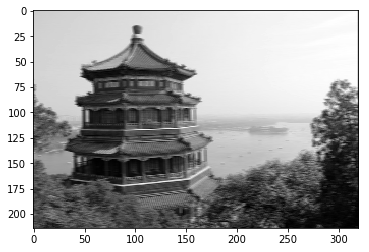

In [30]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_images

# Load sample images
dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create 2 filters
filter_test = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filter_test[:, 3, :, 0] = 1 # vertical line
filter_test[3, :, :, 1] = 1 # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filter_test, strides=[1, 2, 2, 1], padding='SAME')

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
    
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(output[0, :, :, 1], cmap='gray') # plot 1st image's 2nd feature map
plt.show()